In [89]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
plt.style.use('ggplot')
pd.set_option('display.max_columns',200)

Loading the data

In [90]:
df = pd.read_csv('coaster_db.csv')
df.head()

,coaster_name,Length,Speed,Location,Status,Opening date,Type,Manufacturer,Height restriction,Model,Height,Inversions,Lift/launch system,Cost,Trains,Park section,Duration,Capacity,G-force,Designer,Max vertical angle,Drop,Soft opening date,Fast Lane available,Replaced,Track layout,Fastrack available,Soft opening date.1,Closing date,Opened,Replaced by,Website,Flash Pass Available,Must transfer from wheelchair,Theme,Single rider line available,Restraint Style,Flash Pass available,Acceleration,Restraints,Name,year_introduced,latitude,longitude,Type_Main,opening_date_clean,speed1,speed2,speed1_value,speed1_unit,speed_mph,height_value,height_unit,height_ft,Inversions_clean,Gforce_clean
0,Switchback Railway,600 ft (180 m),6 mph (9.7 km/h),Coney Island,Removed,"June 16, 1884",Wood,LaMarcus Adna Thompson,NaN,Lift Packed,50 ft (15 m),NaN,gravity,NaN,NaN,Coney Island Cyclone Site,1:00,1600 riders per hour,2.9,LaMarcus Adna Thompson,30°,43 ft (13 m),NaN,NaN,NaN,Gravity pulled coaster,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1884,40.5740,-73.9780,Wood,1884-06-16,6 mph,9.7 km/h,6.0,mph,6.0,50.0,ft,NaN,0,2.9
1,Flip Flap Railway,NaN,NaN,Sea Lion Park,Removed,1895,Wood,Lina Beecher,NaN,NaN,NaN,1.0,NaN,NaN,a single car. Riders are arranged 1 across in ...,NaN,NaN,NaN,12,Lina Beecher,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1902,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1895,40.5780,-73.9790,Wood,1895-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,12.0
2,Switchback Railway (Euclid Beach Park),NaN,NaN,"Cleveland, Ohio, United States",Closed,NaN,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1895,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1896,41.5800,-81.5700,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
3,Loop the Loop (Coney Island),NaN,NaN,Other,Removed,1901,Steel,Edwin Prescott,NaN,NaN,NaN,1.0,NaN,NaN,a single car. Riders are arranged 2 across in ...,NaN,NaN,NaN,NaN,Edward A. Green,NaN,NaN,NaN,NaN,Switchback Railway,NaN,NaN,NaN,1910,NaN,Giant Racer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1901,40.5745,-73.9780,Steel,1901-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
4,Loop the Loop (Young's Pier),NaN,NaN,Other,Removed,1901,Steel,Edwin Prescott,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Edward A. Green,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1912,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1901,39.3538,-74.4342,Steel,1901-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN


In [91]:
df.shape

(1087, 56)

In [92]:
df.columns

Index(['coaster_name', 'Length', 'Speed', 'Location', 'Status', 'Opening date',
       'Type', 'Manufacturer', 'Height restriction', 'Model', 'Height',
       'Inversions', 'Lift/launch system', 'Cost', 'Trains', 'Park section',
       'Duration', 'Capacity', 'G-force', 'Designer', 'Max vertical angle',
       'Drop', 'Soft opening date', 'Fast Lane available', 'Replaced',
       'Track layout', 'Fastrack available', 'Soft opening date.1',
       'Closing date', 'Opened', 'Replaced by', 'Website',
       'Flash Pass Available', 'Must transfer from wheelchair', 'Theme',
       'Single rider line available', 'Restraint Style',
       'Flash Pass available', 'Acceleration', 'Restraints', 'Name',
       'year_introduced', 'latitude', 'longitude', 'Type_Main',
       'opening_date_clean', 'speed1', 'speed2', 'speed1_value', 'speed1_unit',
       'speed_mph', 'height_value', 'height_unit', 'height_ft',
       'Inversions_clean', 'Gforce_clean'],
      dtype='object')

In [93]:
df.dtypes

coaster_name                      object
Length                            object
Speed                             object
Location                          object
Status                            object
Opening date                      object
Type                              object
Manufacturer                      object
Height restriction                object
Model                             object
Height                            object
Inversions                       float64
Lift/launch system                object
Cost                              object
Trains                            object
Park section                      object
Duration                          object
Capacity                          object
G-force                           object
Designer                          object
Max vertical angle                object
Drop                              object
Soft opening date                 object
Fast Lane available               object
Replaced        

In [94]:
df.describe()

,Inversions,year_introduced,latitude,longitude,speed1_value,speed_mph,height_value,height_ft,Inversions_clean,Gforce_clean
count,932.000000,1087.000000,812.000000,812.000000,937.000000,937.000000,965.000000,171.000000,1087.000000,362.000000
mean,1.547210,1994.986201,38.373484,-41.595373,53.850374,48.617289,89.575171,101.996491,1.326587,3.824006
std,2.114073,23.475248,15.516596,72.285227,23.385518,16.678031,136.246444,67.329092,2.030854,0.989998
min,0.000000,1884.000000,-48.261700,-123.035700,5.000000,5.000000,4.000000,13.100000,0.000000,0.800000
25%,0.000000,1989.000000,35.031050,-84.552200,40.000000,37.300000,44.000000,51.800000,0.000000,3.400000
50%,0.000000,2000.000000,40.289800,-76.653600,50.000000,49.700000,79.000000,91.200000,0.000000,4.000000
75%,3.000000,2010.000000,44.799600,2.778100,63.000000,58.000000,113.000000,131.200000,2.000000,4.500000
max,14.000000,2022.000000,63.230900,153.426500,240.000000,149.100000,3937.000000,377.300000,14.000000,12.000000


#### Data Preperation

In [95]:
df.columns

Index(['coaster_name', 'Length', 'Speed', 'Location', 'Status', 'Opening date',
       'Type', 'Manufacturer', 'Height restriction', 'Model', 'Height',
       'Inversions', 'Lift/launch system', 'Cost', 'Trains', 'Park section',
       'Duration', 'Capacity', 'G-force', 'Designer', 'Max vertical angle',
       'Drop', 'Soft opening date', 'Fast Lane available', 'Replaced',
       'Track layout', 'Fastrack available', 'Soft opening date.1',
       'Closing date', 'Opened', 'Replaced by', 'Website',
       'Flash Pass Available', 'Must transfer from wheelchair', 'Theme',
       'Single rider line available', 'Restraint Style',
       'Flash Pass available', 'Acceleration', 'Restraints', 'Name',
       'year_introduced', 'latitude', 'longitude', 'Type_Main',
       'opening_date_clean', 'speed1', 'speed2', 'speed1_value', 'speed1_unit',
       'speed_mph', 'height_value', 'height_unit', 'height_ft',
       'Inversions_clean', 'Gforce_clean'],
      dtype='object')

In [96]:
df = df[['coaster_name', 
    # 'Length', 'Speed', 
    'Location', 'Status',
    # 'Opening date',
       #'Type', 
       'Manufacturer', 
       # 'Height restriction', 'Model', 'Height',
    #    'Inversions', 'Lift/launch system', 'Cost', 'Trains', 'Park section',
    #    'Duration', 'Capacity', 'G-force', 'Designer', 'Max vertical angle',
    #    'Drop', 'Soft opening date', 'Fast Lane available', 'Replaced',
    #    'Track layout', 'Fastrack available', 'Soft opening date.1',
    #    'Closing date',
       'Opened', 
    #    'Replaced by', 'Website',
    #    'Flash Pass Available', 'Must transfer from wheelchair', 'Theme',
    #    'Single rider line available', 'Restraint Style',
    #    'Flash Pass available', 'Acceleration', 'Restraints', 'Name',
       'year_introduced', 'latitude', 'longitude', 'Type_Main',
       'opening_date_clean',
    #    'speed1', 'speed2', 'speed1_value', 'speed1_unit',
       'speed_mph', 
    # 'height_value', 'height_unit',
    'height_ft',
       'Inversions_clean', 'Gforce_clean']].copy() # using copy method will create a sepereate copy insted of just a reference

In [97]:
df.shape

(1087, 14)

In [98]:
df.dtypes

coaster_name           object
Location               object
Status                 object
Manufacturer           object
Opened                 object
year_introduced         int64
latitude              float64
longitude             float64
Type_Main              object
opening_date_clean     object
speed_mph             float64
height_ft             float64
Inversions_clean        int64
Gforce_clean          float64
dtype: object

In [99]:

df['opening_date_clean'] = pd.to_datetime(df['opening_date_clean'])
df.dtypes

coaster_name                  object
Location                      object
Status                        object
Manufacturer                  object
Opened                        object
year_introduced                int64
latitude                     float64
longitude                    float64
Type_Main                     object
opening_date_clean    datetime64[ns]
speed_mph                    float64
height_ft                    float64
Inversions_clean               int64
Gforce_clean                 float64
dtype: object

Renaming columns

In [100]:
df.columns

Index(['coaster_name', 'Location', 'Status', 'Manufacturer', 'Opened',
       'year_introduced', 'latitude', 'longitude', 'Type_Main',
       'opening_date_clean', 'speed_mph', 'height_ft', 'Inversions_clean',
       'Gforce_clean'],
      dtype='object')

In [101]:
df = df.rename(columns={'coaster_name':'Coaster_Name',
                   'year_introduced':'Year_Introduced',
                   'opening_date_clean':'Opening_Date',
                   'Gforce_clean':'Gforce'})
df.head()

,Coaster_Name,Location,Status,Manufacturer,Opened,Year_Introduced,latitude,longitude,Type_Main,Opening_Date,speed_mph,height_ft,Inversions_clean,Gforce
0,Switchback Railway,Coney Island,Removed,LaMarcus Adna Thompson,NaN,1884,40.5740,-73.9780,Wood,1884-06-16,6.0,NaN,0,2.9
1,Flip Flap Railway,Sea Lion Park,Removed,Lina Beecher,NaN,1895,40.5780,-73.9790,Wood,1895-01-01,NaN,NaN,1,12.0
2,Switchback Railway (Euclid Beach Park),"Cleveland, Ohio, United States",Closed,NaN,1895,1896,41.5800,-81.5700,Other,NaT,NaN,NaN,0,NaN
3,Loop the Loop (Coney Island),Other,Removed,Edwin Prescott,NaN,1901,40.5745,-73.9780,Steel,1901-01-01,NaN,NaN,1,NaN
4,Loop the Loop (Young's Pier),Other,Removed,Edwin Prescott,NaN,1901,39.3538,-74.4342,Steel,1901-01-01,NaN,NaN,1,NaN


In [102]:
df.isnull().sum()

Coaster_Name           0
Location               0
Status               213
Manufacturer          59
Opened              1060
Year_Introduced        0
latitude             275
longitude            275
Type_Main              0
Opening_Date         250
speed_mph            150
height_ft            916
Inversions_clean       0
Gforce               725
dtype: int64

In [103]:
df.loc[df.duplicated()]

,Coaster_Name,Location,Status,Manufacturer,Opened,Year_Introduced,latitude,longitude,Type_Main,Opening_Date,speed_mph,height_ft,Inversions_clean,Gforce


In [104]:
df.loc[df.duplicated(subset=['Coaster_Name'])].head()

,Coaster_Name,Location,Status,Manufacturer,Opened,Year_Introduced,latitude,longitude,Type_Main,Opening_Date,speed_mph,height_ft,Inversions_clean,Gforce
43,Crystal Beach Cyclone,Crystal Beach Park,Removed,Traver Engineering,NaN,1927,42.8617,-79.0598,Wood,1926-01-01,60.0,NaN,0,4.0
60,Derby Racer,Revere Beach,Removed,Fred W. Pearce,NaN,1937,42.4200,-70.9860,Wood,1911-01-01,NaN,NaN,0,NaN
61,Blue Streak (Conneaut Lake),Conneaut Lake Park,Closed,NaN,NaN,1938,41.6349,-80.3180,Wood,1938-05-23,50.0,NaN,0,NaN
167,Big Thunder Mountain Railroad,Other,NaN,Arrow Development (California and Florida)Dyna...,NaN,1980,NaN,NaN,Steel,NaT,35.0,NaN,0,NaN
237,Thunder Run (Canada's Wonderland),Canada's Wonderland,Operating,Mack Rides,NaN,1986,43.8427,-79.5423,Steel,1981-05-23,39.8,32.8,0,NaN


In [105]:
df.loc[df['Coaster_Name'] == 'Crystal Beach Cyclone']

,Coaster_Name,Location,Status,Manufacturer,Opened,Year_Introduced,latitude,longitude,Type_Main,Opening_Date,speed_mph,height_ft,Inversions_clean,Gforce
39,Crystal Beach Cyclone,Crystal Beach Park,Removed,Traver Engineering,NaN,1926,42.8617,-79.0598,Wood,1926-01-01,60.0,NaN,0,4.0
43,Crystal Beach Cyclone,Crystal Beach Park,Removed,Traver Engineering,NaN,1927,42.8617,-79.0598,Wood,1926-01-01,60.0,NaN,0,4.0


above filtering is useed by query method down below

In [106]:
df.query("Coaster_Name == 'Crystal Beach Cyclone'")

,Coaster_Name,Location,Status,Manufacturer,Opened,Year_Introduced,latitude,longitude,Type_Main,Opening_Date,speed_mph,height_ft,Inversions_clean,Gforce
39,Crystal Beach Cyclone,Crystal Beach Park,Removed,Traver Engineering,NaN,1926,42.8617,-79.0598,Wood,1926-01-01,60.0,NaN,0,4.0
43,Crystal Beach Cyclone,Crystal Beach Park,Removed,Traver Engineering,NaN,1927,42.8617,-79.0598,Wood,1926-01-01,60.0,NaN,0,4.0


In [107]:
df.columns

Index(['Coaster_Name', 'Location', 'Status', 'Manufacturer', 'Opened',
       'Year_Introduced', 'latitude', 'longitude', 'Type_Main', 'Opening_Date',
       'speed_mph', 'height_ft', 'Inversions_clean', 'Gforce'],
      dtype='object')

In [108]:
df.duplicated(subset = ['Coaster_Name', 'Location','Opening_Date']).sum()

np.int64(97)

In [109]:
# Dropping duplicated rows
df = df.loc[~df.duplicated(subset = ['Coaster_Name', 'Location','Opening_Date'])]
df
# if we do this , the index would not be in an order, for that we have to make it 'reset_index'

,Coaster_Name,Location,Status,Manufacturer,Opened,Year_Introduced,latitude,longitude,Type_Main,Opening_Date,speed_mph,height_ft,Inversions_clean,Gforce
0,Switchback Railway,Coney Island,Removed,LaMarcus Adna Thompson,NaN,1884,40.5740,-73.9780,Wood,1884-06-16,6.0,NaN,0,2.9
1,Flip Flap Railway,Sea Lion Park,Removed,Lina Beecher,NaN,1895,40.5780,-73.9790,Wood,1895-01-01,NaN,NaN,1,12.0
2,Switchback Railway (Euclid Beach Park),"Cleveland, Ohio, United States",Closed,NaN,1895,1896,41.5800,-81.5700,Other,NaT,NaN,NaN,0,NaN
3,Loop the Loop (Coney Island),Other,Removed,Edwin Prescott,NaN,1901,40.5745,-73.9780,Steel,1901-01-01,NaN,NaN,1,NaN
4,Loop the Loop (Young's Pier),Other,Removed,Edwin Prescott,NaN,1901,39.3538,-74.4342,Steel,1901-01-01,NaN,NaN,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1079,Ice Breaker (roller coaster),SeaWorld Orlando,Under construction,Premier Rides,NaN,2022,28.4088,-81.4633,Steel,2022-02-01,52.0,NaN,0,NaN
1081,Leviathan (Sea World),Sea World,Under construction,Martin & Vleminckx,NaN,2022,-27.9574,153.4263,Wood,2022-01-01,49.7,105.0,0,NaN
1083,Pantheon (roller coaster),Busch Gardens Williamsburg,Under construction,Intamin,NaN,2022,37.2339,-76.6426,Steel,2022-01-01,73.0,NaN,2,NaN
1085,Tumbili,Kings Dominion,Under construction,S&S – Sansei Technologies,NaN,2022,NaN,NaN,Steel,NaT,34.0,NaN,0,NaN


In [110]:
# Dropping duplicated rows with resetting index
df = df.loc[~df.duplicated(subset = ['Coaster_Name', 'Location','Opening_Date'])].reset_index(drop=True).copy()
df.shape

(990, 14)

In [111]:
df.isnull().sum()

Coaster_Name          0
Location              0
Status              146
Manufacturer         58
Opened              963
Year_Introduced       0
latitude            207
longitude           207
Type_Main             0
Opening_Date        183
speed_mph           140
height_ft           831
Inversions_clean      0
Gforce              666
dtype: int64

#### Feature Engineering

In [112]:
df.columns

Index(['Coaster_Name', 'Location', 'Status', 'Manufacturer', 'Opened',
       'Year_Introduced', 'latitude', 'longitude', 'Type_Main', 'Opening_Date',
       'speed_mph', 'height_ft', 'Inversions_clean', 'Gforce'],
      dtype='object')

In [113]:
df['Year_Introduced'].value_counts()

Year_Introduced
1999    46
2000    45
1998    30
2001    29
2002    28
        ..
1952     1
1956     1
1961     1
1955     1
1959     1
Name: count, Length: 101, dtype: int64

Text(0, 0.5, 'Count')

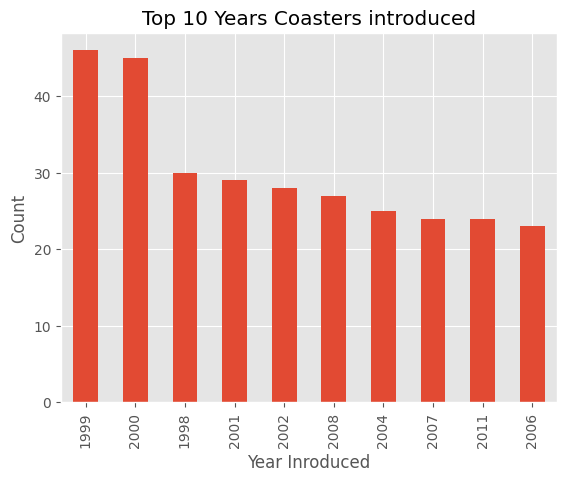

In [114]:
ax = df['Year_Introduced'].value_counts() \
    .head(10) \
    .plot(kind='bar', title='Top 10 Years Coasters introduced')
    
ax.set_xlabel('Year Inroduced')
ax.set_ylabel('Count')

In [115]:
df.columns

Index(['Coaster_Name', 'Location', 'Status', 'Manufacturer', 'Opened',
       'Year_Introduced', 'latitude', 'longitude', 'Type_Main', 'Opening_Date',
       'speed_mph', 'height_ft', 'Inversions_clean', 'Gforce'],
      dtype='object')

Text(0.5, 0, 'Speed (mph)')

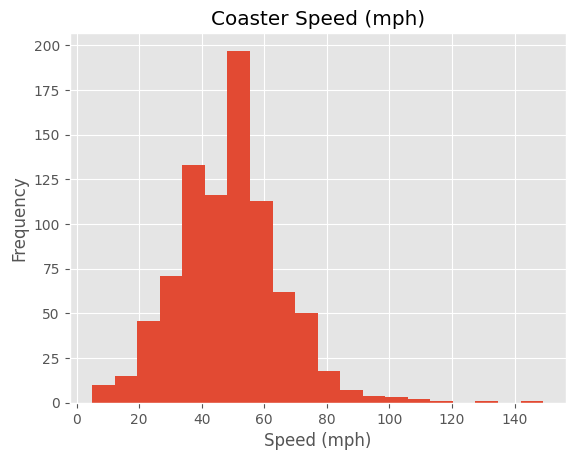

In [116]:
ax = df['speed_mph'].plot(kind='hist',bins = 20, title='Coaster Speed (mph)')
ax.set_xlabel('Speed (mph)')

Text(0.5, 0, 'Speed (mph)')

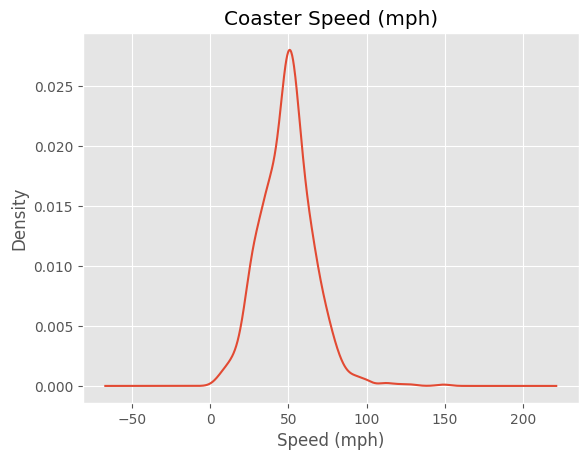

In [118]:
ax = df['speed_mph'].plot(kind='kde', title='Coaster Speed (mph)')
ax.set_xlabel('Speed (mph)')

#### Feature Relationships

finding relatinships between speed and height

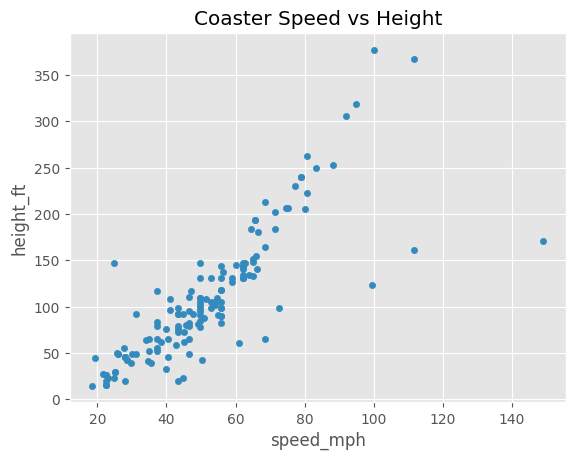

In [124]:
df.plot(kind='scatter',x='speed_mph', y = 'height_ft',title='Coaster Speed vs Height')
plt.show()

In [120]:
df.columns

Index(['Coaster_Name', 'Location', 'Status', 'Manufacturer', 'Opened',
       'Year_Introduced', 'latitude', 'longitude', 'Type_Main', 'Opening_Date',
       'speed_mph', 'height_ft', 'Inversions_clean', 'Gforce'],
      dtype='object')

Comparing more than 2 columns

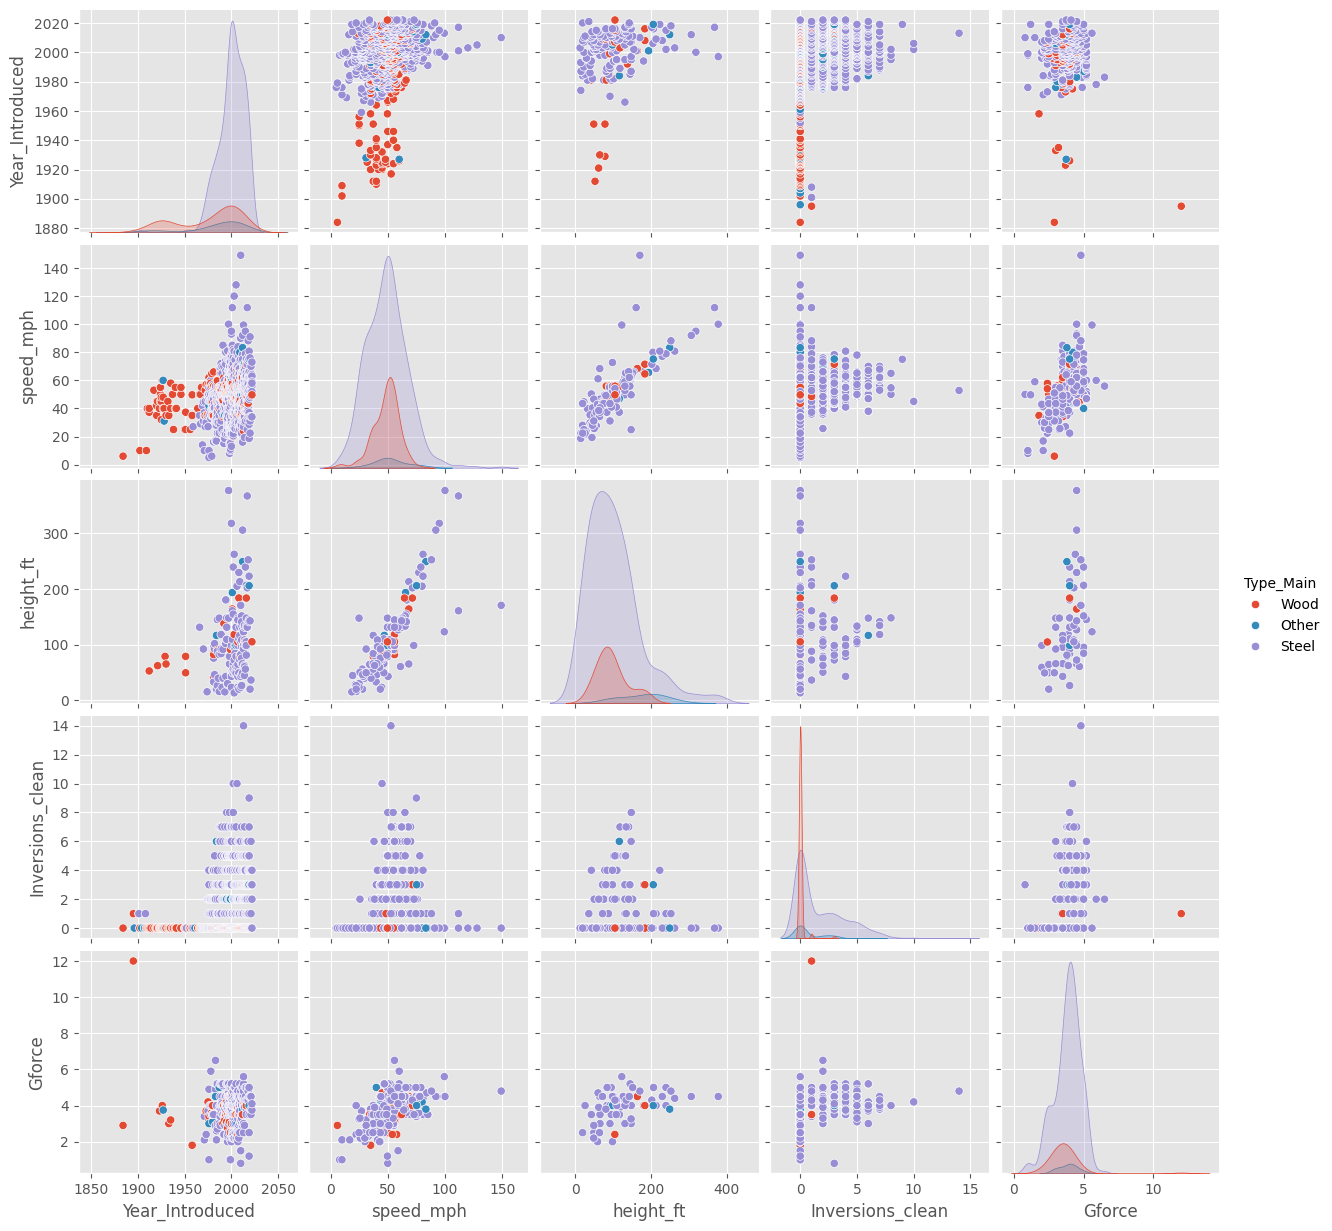

In [127]:
sns.pairplot(df, vars=['Year_Introduced','speed_mph','height_ft','Inversions_clean','Gforce'], hue='Type_Main')


In [125]:
df.head()

,Coaster_Name,Location,Status,Manufacturer,Opened,Year_Introduced,latitude,longitude,Type_Main,Opening_Date,speed_mph,height_ft,Inversions_clean,Gforce
0,Switchback Railway,Coney Island,Removed,LaMarcus Adna Thompson,NaN,1884,40.5740,-73.9780,Wood,1884-06-16,6.0,NaN,0,2.9
1,Flip Flap Railway,Sea Lion Park,Removed,Lina Beecher,NaN,1895,40.5780,-73.9790,Wood,1895-01-01,NaN,NaN,1,12.0
2,Switchback Railway (Euclid Beach Park),"Cleveland, Ohio, United States",Closed,NaN,1895,1896,41.5800,-81.5700,Other,NaT,NaN,NaN,0,NaN
3,Loop the Loop (Coney Island),Other,Removed,Edwin Prescott,NaN,1901,40.5745,-73.9780,Steel,1901-01-01,NaN,NaN,1,NaN
4,Loop the Loop (Young's Pier),Other,Removed,Edwin Prescott,NaN,1901,39.3538,-74.4342,Steel,1901-01-01,NaN,NaN,1,NaN


Understanding the correlation between the columns

In [129]:
df_corr = df[['Year_Introduced','speed_mph','height_ft','Inversions_clean','Gforce']].dropna().corr()
df_corr

,Year_Introduced,speed_mph,height_ft,Inversions_clean,Gforce
Year_Introduced,1.000000,0.171978,0.135413,-0.209887,0.160247
speed_mph,0.171978,1.000000,0.733999,-0.028705,0.607383
height_ft,0.135413,0.733999,1.000000,-0.079736,0.466482
Inversions_clean,-0.209887,-0.028705,-0.079736,1.000000,0.275991
Gforce,0.160247,0.607383,0.466482,0.275991,1.000000


<Axes: >

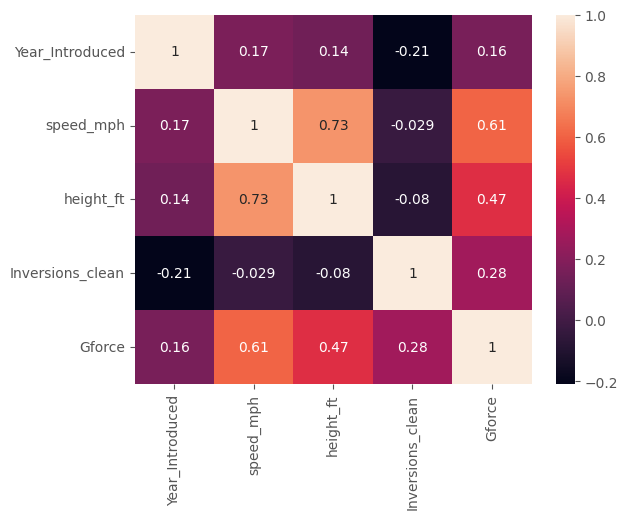

In [131]:
sns.heatmap(df_corr,annot=True)

? What are the locations with fastest rollercoaster ( minimum of 10)

In [133]:
df['Location'].value_counts()

Location
Other                       181
Kings Island                 19
Cedar Point                  18
Six Flags Magic Mountain     17
Hersheypark                  16
                           ... 
China Dinosaurs Park          1
Legoland Billund              1
Happy Valley Tianjin          1
Adlabs Imagica                1
Epcot                         1
Name: count, Length: 280, dtype: int64

Here just ignoring the other locations for better understanding

<Axes: title={'center': 'Average Coast speed by location'}, ylabel='Location'>

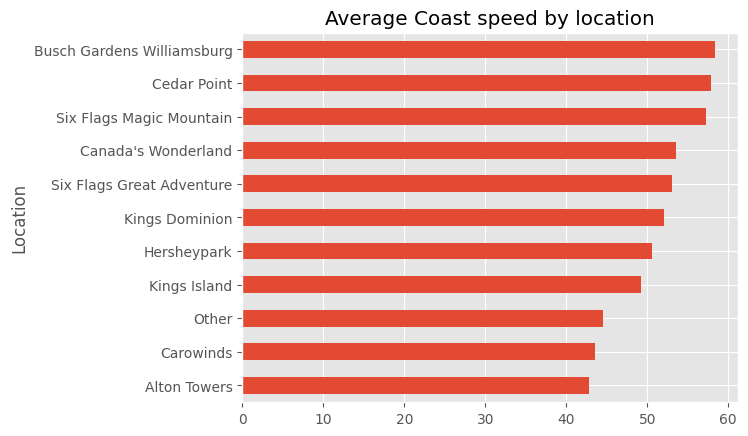

In [154]:
df.query('Location != "other"')\
    .groupby('Location')['speed_mph'].agg(['mean','count'])\
        .query('count >= 10').sort_values('mean')['mean'].plot(kind='barh', title= "Average Coast speed by location")